In [ ]:
##Librerias para análisis estadistico y matemático
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft, fftfreq, fftshift
import seaborn as sns ##Histograms
from numpy import logspace
import sympy as sym
import numpy as np
from scipy.optimize import minimize

In [ ]:
#!pip install lcapy
#!pip install folium==0.2.1
#!pip install pdflatex
#!sudo apt-get install texlive-latex-recommended 
#!sudo apt install texlive-latex-extra
#!sudo apt install dvipng

!pip install lcapy
from lcapy import Circuit, j, omega, s

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Circuit Design
ctt=Circuit(
'''
    Vi 1 0_1 step; down
    C1 1 2; right, size=1.5
    R1 2 0; down, size=1.5
    C2 2 3; right, size=1.5
    R3 2 3; right, offset=0.7
    R2 3 0_3; down
    W 0_1 0; right
    W 0 0_3; right
'''
)

#ctt.draw()

In [ ]:
#@title 3.1) Función de transferencia

In [ ]:
H=(ctt.R2.V(s)/ctt.Vi.V(s)).simplify()
H

                            C₁⋅R₁⋅R₂⋅s⋅(C₂⋅R₃⋅s + 1)                          
──────────────────────────────────────────────────────────────────────────────
                2                                                             
C₁⋅C₂⋅R₁⋅R₂⋅R₃⋅s  + R₁ + R₂ + R₃ + s⋅(C₁⋅R₁⋅R₂ + C₁⋅R₁⋅R₃ + C₂⋅R₁⋅R₃ + C₂⋅R₂⋅R

  
──
  
₃)

In [ ]:
C1=4.7e-4
C2=4.7e-4
R1=1000
R2=2000
R3=500

In [ ]:
#@title High pass filter transfer function
H_valores=H.subs('C1', C1).subs('C2', C2).subs('R1', R1).subs('R2',R2).subs('R3', R3)

Text(0, 0.5, 'Magnitud (dB)')

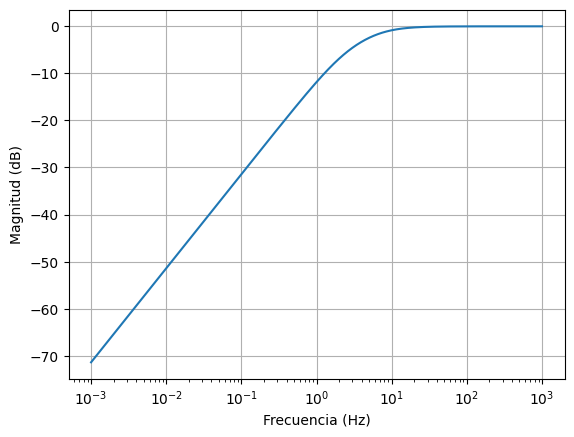

In [ ]:
W=logspace(-3,3,2000) ##GENERAMOS VECTOR DE FRECUENCIAS
X=H_valores(j*omega).dB.plot(W, log_frequency=True)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')

In [ ]:
##Usando LTI para simular en tiempo
Coeficientes_num=[C1*R1*R2*C2*R3,C1*R1*R2, 0]
Coeficientes_den=[C1*C2*R1*R2*R3, C1*R1*R2+C1*R1*R3+C2*R1*R3+C2*R2*R3, R1+R2+R3]

In [ ]:
#@title Impluse response
lti_system=lti(Coeficientes_num, Coeficientes_den)          #Simulando sistema slit
N=4096          #Definiendo numero de muestras
t1, h=lti_system.impulse(N)              #obteneindo respuesta al impulso

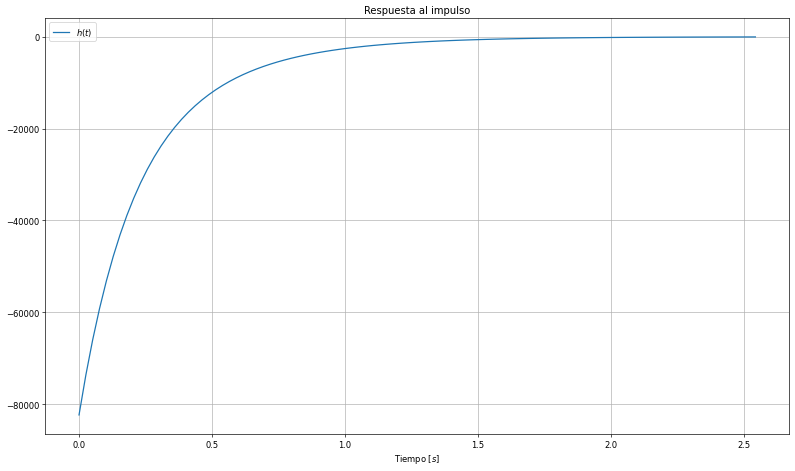

In [ ]:
plt.figure(figsize=(16,9), dpi=60)
plt.plot(t1,h, label='$h(t)$')
plt.grid(True)
plt.legend()
plt.title('Respuesta al impulso')
plt.xlabel('Tiempo [$s$]')
plt.show()

Text(0, 0.5, 'Amplitud')

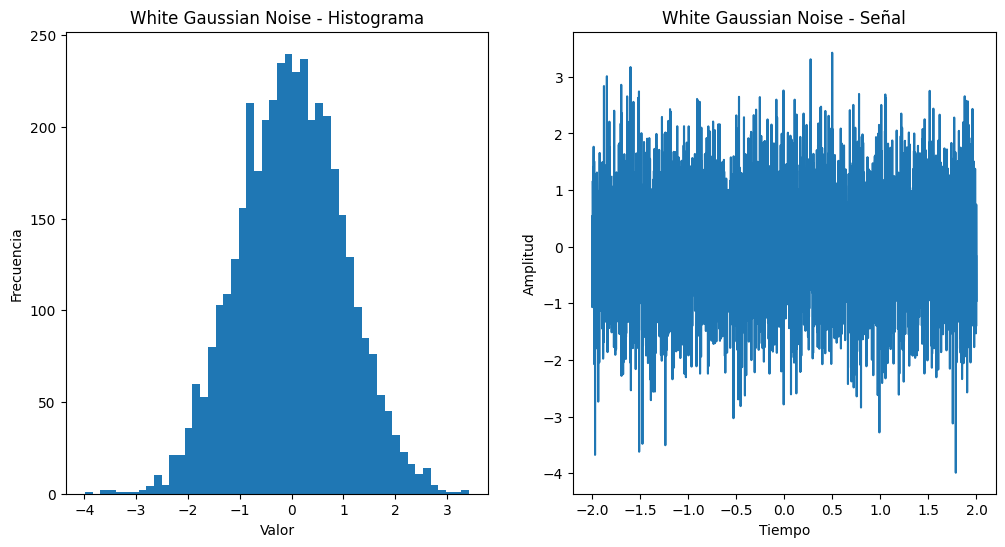

In [ ]:
#@title White gaussian noise generation
# Definimos la muestra de datos
mu, sigma = 0, 1 # media y desvio estandar
N=4096
t=np.linspace(-2, 2, N)

WGN = np.random.normal(mu, sigma, N) #creando muestra de datos

# Crear figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico del histograma
axs[0].set_title(r'White Gaussian Noise - Histograma')
axs[0].hist(WGN, 50)
axs[0].set_xlabel('Valor')
axs[0].set_ylabel('Frecuencia')

# Gráfico de la señal
axs[1].set_title('White Gaussian Noise - Señal')
axs[1].plot(t, WGN)
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')

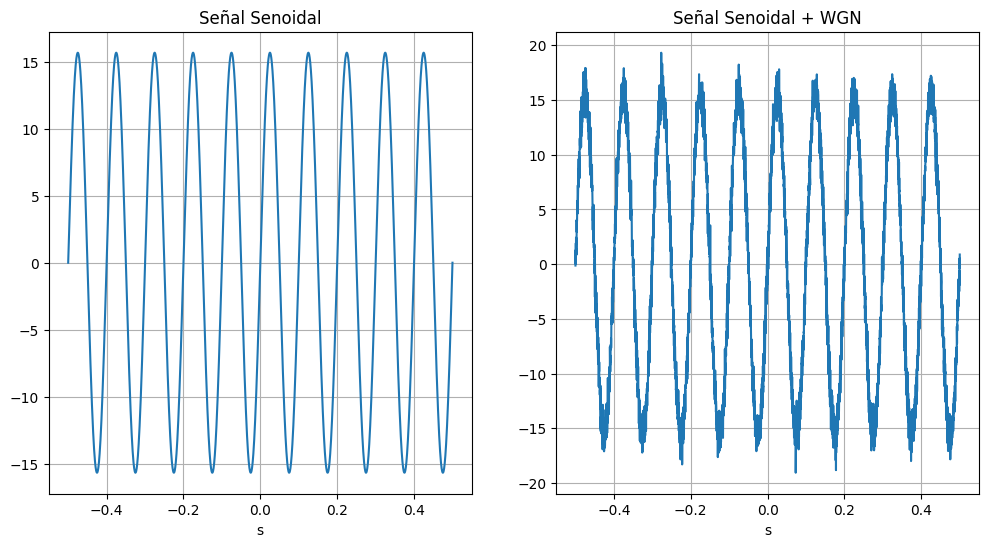

In [ ]:
#@title Sine generation and added with WGN
peak_value = np.max(np.abs(WGN)) ##Valor pico de la señal de ruido

dB_deseado=10
Vamp=peak_value*np.exp(dB_deseado/10)+peak_value ##Valor pico para la generación de la señal sinusoidal

Frec_Des=10

t=np.linspace(-0.5, 0.5, N)

xa=Vamp*np.sin(2*np.pi*Frec_Des*t)#La señal continua

Seno_WGN=xa+WGN

# Crear figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_title('Sinusoidal signal')
axs[0].set_xlabel('s') #Nombre del eje x 
axs[0].plot(t, xa) #Gráfica de la señal con el tiempo en milisegundos
axs[0].grid() #Poner cuadricula

axs[1].set_title('sinusoidal signal + WGN')
axs[1].set_xlabel('s') #Nombre del eje x 
axs[1].plot(t,Seno_WGN) #Gráfica de la señal con el tiempo en milisegundos
axs[1].grid() #Poner cuadricula

Text(0, 0.5, 'Correlación')

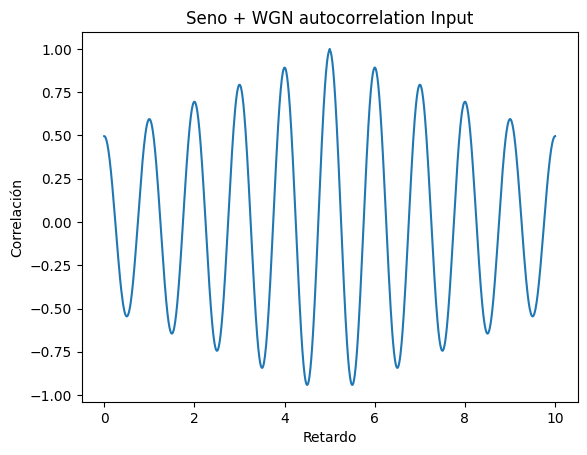

In [ ]:
#@title Sine with WGN autocorrelation
Autocorr_Seno=np.correlate(Seno_WGN, Seno_WGN,mode="same") ## GENERAMOS LA AUTOCORRELACION
max_value1 = np.max(Autocorr_Seno)      ##Valor máximo de la señal
Autocorr_Seno_WGN = Autocorr_Seno / max_value1          ## Autocorrelación normalizada

plt.plot(t, Autocorr_Seno_WGN)
plt.title("Seno + WGN autocorrelation Input")
plt.xlabel("Retardo")
plt.ylabel("Correlación")

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'PDS')

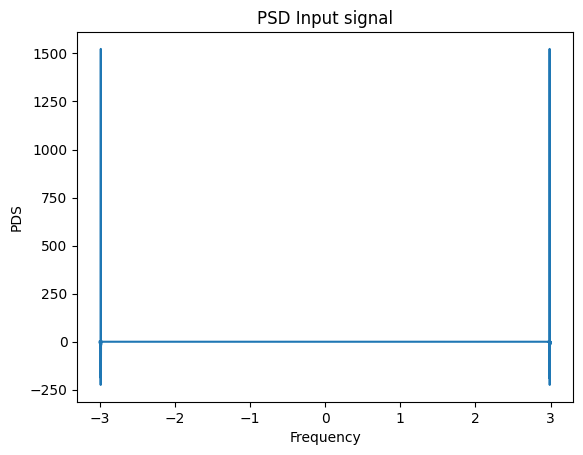

In [ ]:
#@title Power Spectral Density input circuit

""""""""""""""""
Se calcula la densidad espectral de potencia por medio de la transformada
de fourier de la función de autocorrelación

"""""""""""""""

# Calcula la transformada de Fourier
fft_result = np.fft.fft(Autocorr_Seno_WGN)

t_PSD=np.linspace(-3, 3, N)

plt.plot(t_PSD, fft_result)
plt.title("PSD Input signal")
plt.xlabel("Frequency")
plt.ylabel("PDS")

Text(0.5, 0, 'Time')

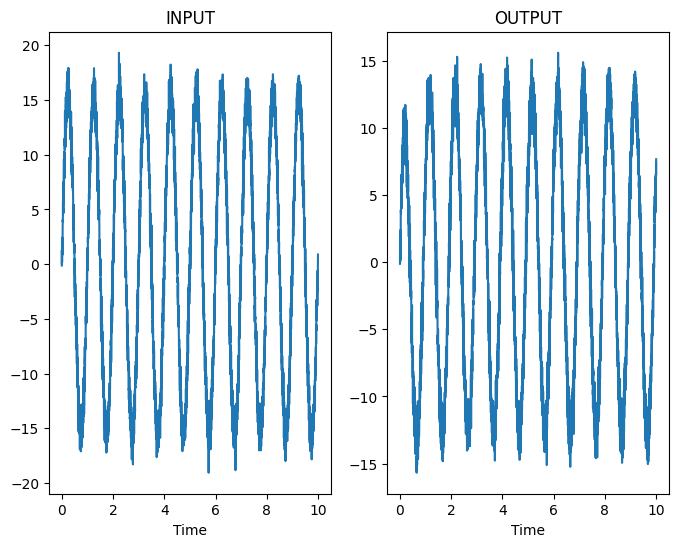

In [ ]:
#@title Input and output graphics
""""""""""""""""
Se ingresa la señal con el ruido a nuestro circuito

"""""""""""""""
t=np.linspace(0, 10, N)
_,Output_Circuit,_=lti_system.output(Seno_WGN, t) ##SALIDA DEL CIRCUITO.

# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(8,6))
axs[0].plot(t, Seno_WGN)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(t, Output_Circuit)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")

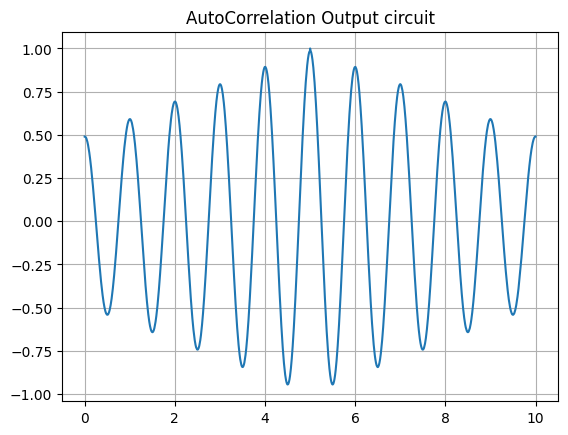

In [ ]:
#@title Output circuit autocorrelation
Autocorrelacion_Gaussian1=np.correlate(Output_Circuit,Output_Circuit,mode="same") ## GENERAMOS LA AUTOCORRELACION
max_value1 = np.max(Autocorrelacion_Gaussian1)
Autocorrelacion_Gaussian_normalized1 = Autocorrelacion_Gaussian1 / max_value1

plt.plot(t,Autocorrelacion_Gaussian_normalized1)

hist_kws={"edgecolor":"balck"}
plt.title("AutoCorrelation Output circuit")
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'PDS')

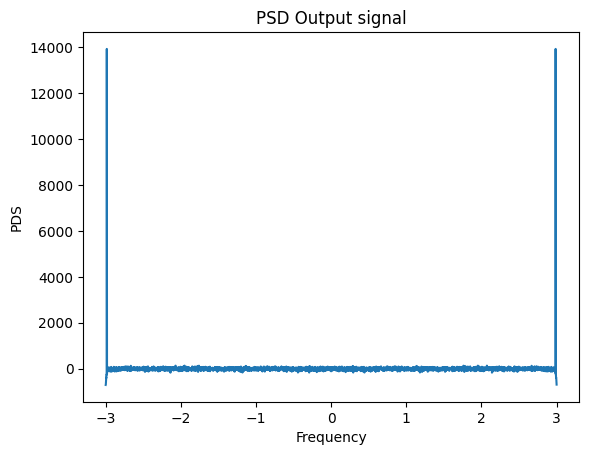

In [ ]:
#@title Power Spectral Density output circuit

""""""""""""""""
Se calcula la densidad espectral de potencia por medio de la transformada
de fourier de la función de autocorrelación

"""""""""""""""

# Calcula la transformada de Fourier
fft_result = np.fft.fft(Output_Circuit)

t_PSD=np.linspace(-3, 3, N)

plt.plot(t_PSD, fft_result)
plt.title("PSD Output signal")
plt.xlabel("Frequency")
plt.ylabel("PDS")